# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2. Import the dataset from the folder.

In [36]:
online_rt = pd.read_csv("Exercise Data Files/Pandas Exercise Online Retail files/Online_Retail.csv", 
                        encoding="ISO-8859-1")

### Step 3. Assign it to a variable called online_rt

In [37]:
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

In [38]:
countries = online_rt.groupby('Country').sum()
countries = countries.sort_values(by='Quantity',ascending=False)[1:11]
countries

,Quantity,UnitPrice,CustomerID
Country,,,
Netherlands,200128,6492.55,34190538.0
EIRE,142637,48447.19,110391745.0
Germany,117448,37666.00,120075093.0
France,110480,43031.99,107648864.0
Australia,83653,4054.75,15693002.0
Sweden,35637,1806.83,6790083.0
Switzerland,30325,6813.69,23775916.0
Spain,26824,12633.45,32689291.0
Japan,25218,814.86,4567292.0


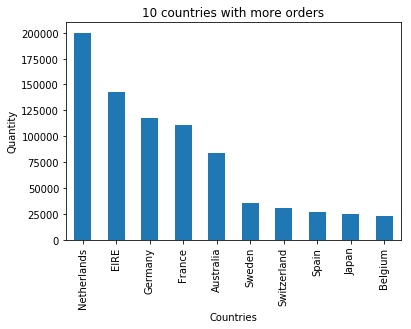

In [39]:
countries['Quantity'].plot(kind='bar')
plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 countries with more orders')
plt.show()

### Step 5.  Exclude negative Quatity entries

In [44]:
online_rt = online_rt[online_rt['Quantity']> 0]
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries

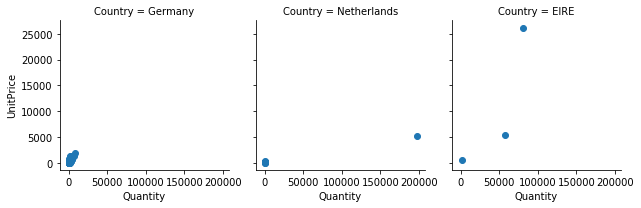

In [46]:
customers = online_rt.groupby(['CustomerID','Country']).sum()
customers = customers[customers.UnitPrice > 0]
customers['Country'] = customers.index.get_level_values(1)
# Top 3 countries are Netherlands,EIRE and Germany as per Step 4
top_countries = ['Netherlands','EIRE','Germany']
customers = customers[customers['Country'].isin(top_countries)]
graph = sns.FacetGrid(customers,col="Country")
graph.map(plt.scatter,'Quantity','UnitPrice')